In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
df = pd.read_csv("bigmart_data.csv")
df.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [144]:
print(df["Item_Weight"].isnull().sum())
print(df["Outlet_Size"].isnull().sum())

1463
2410


In [145]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [146]:
df.describe(include=[object])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [147]:
df["Outlet_Establishment_Year"] = pd.to_datetime(df["Outlet_Establishment_Year"], format='%Y')
for yrs in df["Outlet_Establishment_Year"]:
    print(yrs)

1999-01-01 00:00:00
2009-01-01 00:00:00
1999-01-01 00:00:00
1998-01-01 00:00:00
1987-01-01 00:00:00
2009-01-01 00:00:00
1987-01-01 00:00:00
1985-01-01 00:00:00
2002-01-01 00:00:00
2007-01-01 00:00:00
1999-01-01 00:00:00
1997-01-01 00:00:00
1999-01-01 00:00:00
1997-01-01 00:00:00
1987-01-01 00:00:00
1997-01-01 00:00:00
2009-01-01 00:00:00
1999-01-01 00:00:00
1985-01-01 00:00:00
2004-01-01 00:00:00
1987-01-01 00:00:00
1985-01-01 00:00:00
2004-01-01 00:00:00
1985-01-01 00:00:00
1997-01-01 00:00:00
2007-01-01 00:00:00
2004-01-01 00:00:00
1987-01-01 00:00:00
1998-01-01 00:00:00
1985-01-01 00:00:00
1998-01-01 00:00:00
2009-01-01 00:00:00
2009-01-01 00:00:00
2002-01-01 00:00:00
1997-01-01 00:00:00
1999-01-01 00:00:00
1985-01-01 00:00:00
2009-01-01 00:00:00
1985-01-01 00:00:00
1985-01-01 00:00:00
1997-01-01 00:00:00
1987-01-01 00:00:00
1999-01-01 00:00:00
2009-01-01 00:00:00
1987-01-01 00:00:00
1998-01-01 00:00:00
2002-01-01 00:00:00
2002-01-01 00:00:00
1997-01-01 00:00:00
1985-01-01 00:00:00


2009-01-01 00:00:00
1998-01-01 00:00:00
2007-01-01 00:00:00
2002-01-01 00:00:00
1987-01-01 00:00:00
2007-01-01 00:00:00
1987-01-01 00:00:00
1987-01-01 00:00:00
2004-01-01 00:00:00
1985-01-01 00:00:00
1999-01-01 00:00:00
1999-01-01 00:00:00
2007-01-01 00:00:00
1997-01-01 00:00:00
2004-01-01 00:00:00
1998-01-01 00:00:00
2002-01-01 00:00:00
1998-01-01 00:00:00
1999-01-01 00:00:00
1985-01-01 00:00:00
1985-01-01 00:00:00
2004-01-01 00:00:00
1997-01-01 00:00:00
1987-01-01 00:00:00
1998-01-01 00:00:00
2007-01-01 00:00:00
1999-01-01 00:00:00
1987-01-01 00:00:00
1998-01-01 00:00:00
1999-01-01 00:00:00
2009-01-01 00:00:00
1987-01-01 00:00:00
2009-01-01 00:00:00
2007-01-01 00:00:00
2002-01-01 00:00:00
1985-01-01 00:00:00
2007-01-01 00:00:00
1997-01-01 00:00:00
1985-01-01 00:00:00
1997-01-01 00:00:00
2004-01-01 00:00:00
1987-01-01 00:00:00
1987-01-01 00:00:00
1987-01-01 00:00:00
2009-01-01 00:00:00
1985-01-01 00:00:00
2007-01-01 00:00:00
1999-01-01 00:00:00
2002-01-01 00:00:00
2004-01-01 00:00:00


1999-01-01 00:00:00
1997-01-01 00:00:00
1985-01-01 00:00:00
2004-01-01 00:00:00
1997-01-01 00:00:00
1985-01-01 00:00:00
1998-01-01 00:00:00
1987-01-01 00:00:00
1999-01-01 00:00:00
1997-01-01 00:00:00
1985-01-01 00:00:00
1985-01-01 00:00:00
1998-01-01 00:00:00
1985-01-01 00:00:00
1999-01-01 00:00:00
2007-01-01 00:00:00
2007-01-01 00:00:00
2007-01-01 00:00:00
1997-01-01 00:00:00
1999-01-01 00:00:00
1987-01-01 00:00:00
1987-01-01 00:00:00
2009-01-01 00:00:00
2007-01-01 00:00:00
2002-01-01 00:00:00
1998-01-01 00:00:00
1999-01-01 00:00:00
2009-01-01 00:00:00
2007-01-01 00:00:00
1999-01-01 00:00:00
1985-01-01 00:00:00
2009-01-01 00:00:00
1999-01-01 00:00:00
2009-01-01 00:00:00
1997-01-01 00:00:00
1999-01-01 00:00:00
1998-01-01 00:00:00
1998-01-01 00:00:00
2002-01-01 00:00:00
2004-01-01 00:00:00
1997-01-01 00:00:00
2009-01-01 00:00:00
2007-01-01 00:00:00
2002-01-01 00:00:00
1998-01-01 00:00:00
2007-01-01 00:00:00
1997-01-01 00:00:00
2002-01-01 00:00:00
1997-01-01 00:00:00
1998-01-01 00:00:00


1997-01-01 00:00:00
1985-01-01 00:00:00
1985-01-01 00:00:00
2004-01-01 00:00:00
2004-01-01 00:00:00
2004-01-01 00:00:00
1999-01-01 00:00:00
1998-01-01 00:00:00
1987-01-01 00:00:00
1987-01-01 00:00:00
1985-01-01 00:00:00
2004-01-01 00:00:00
2009-01-01 00:00:00
1985-01-01 00:00:00
2007-01-01 00:00:00
2007-01-01 00:00:00
1987-01-01 00:00:00
2002-01-01 00:00:00
2007-01-01 00:00:00
2007-01-01 00:00:00
2007-01-01 00:00:00
1987-01-01 00:00:00
1985-01-01 00:00:00
1985-01-01 00:00:00
2007-01-01 00:00:00
2002-01-01 00:00:00
2004-01-01 00:00:00
1997-01-01 00:00:00
2004-01-01 00:00:00
1985-01-01 00:00:00
2004-01-01 00:00:00
2004-01-01 00:00:00
2004-01-01 00:00:00
2009-01-01 00:00:00
2009-01-01 00:00:00
1998-01-01 00:00:00
1997-01-01 00:00:00
1999-01-01 00:00:00
2004-01-01 00:00:00
1997-01-01 00:00:00
1999-01-01 00:00:00
2009-01-01 00:00:00
1999-01-01 00:00:00
2009-01-01 00:00:00
1985-01-01 00:00:00
2002-01-01 00:00:00
1985-01-01 00:00:00
1997-01-01 00:00:00
1999-01-01 00:00:00
1987-01-01 00:00:00


1997-01-01 00:00:00
1987-01-01 00:00:00
2002-01-01 00:00:00
2004-01-01 00:00:00
2009-01-01 00:00:00
1997-01-01 00:00:00


In [148]:
df["Years_Active"] = [pd.to_datetime('today').year - age.year for age in df["Outlet_Establishment_Year"]]
df["Years_Active"]

0       23
1       13
2       23
3       24
4       35
        ..
8518    35
8519    20
8520    18
8521    13
8522    25
Name: Years_Active, Length: 8523, dtype: int64

In [149]:
df["Years_Active"].describe()

count    8523.000000
mean       24.168133
std         8.371760
min        13.000000
25%        18.000000
50%        23.000000
75%        35.000000
max        37.000000
Name: Years_Active, dtype: float64

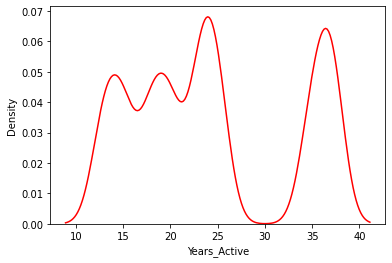

In [160]:
kde = sns.kdeplot(x = df["Years_Active"], color="red")

In [80]:
outlet_size_counts = df["Outlet_Size"].value_counts()
outlet_size_counts

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

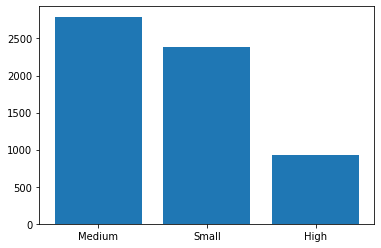

In [81]:
x = outlet_size_counts.index
y = outlet_size_counts.values
plt.bar(x, y)
plt.show()

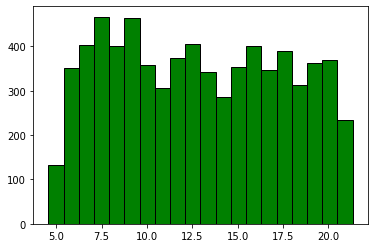

In [152]:
cnt, bins, patches = plt.hist(df["Item_Weight"], bins = 20, color='g', edgecolor="black")
plt.show()

In [140]:
print(cnt, "\n\n")
print(bins, "\n\n")
print(patches , "\n\n")

[132. 351. 403. 467. 401. 464. 358. 306. 373. 406. 342. 287. 354. 401.
 346. 389. 314. 363. 370. 233.] 


[ 4.555    5.39475  6.2345   7.07425  7.914    8.75375  9.5935  10.43325
 11.273   12.11275 12.9525  13.79225 14.632   15.47175 16.3115  17.15125
 17.991   18.83075 19.6705  20.51025 21.35   ] 


<BarContainer object of 20 artists> 




In [ ]:
#Plots for variables/features of the following dataypes
# 1. Continuous - Line, scatter, Bar, Histogram
# 2. Categorical - Piechart, Bar

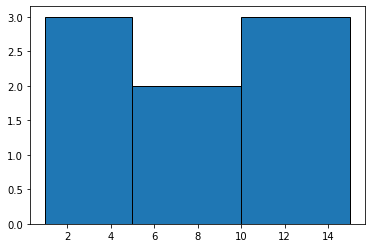

In [156]:
arr = [1, 2, 3, 7, 8, 12, 13, 15] 
plt.hist(arr, bins = [1, 5, 10, 15], edgecolor = "black") 
plt.show()

### Assignment Questions ### 

In [12]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<AxesSubplot:xlabel='alive', ylabel='age'>

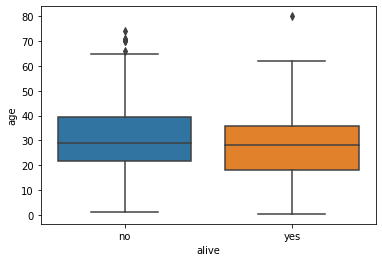

In [7]:
sns.boxplot(data = titanic[titanic["sex"] == "male"], x = "alive", y = "age")

<AxesSubplot:xlabel='alive', ylabel='age'>

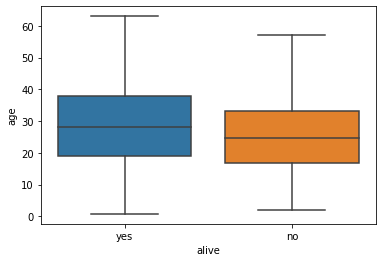

In [8]:
sns.boxplot(data = titanic[titanic["sex"] == "female"], x = "alive", y = "age")

<AxesSubplot:xlabel='sex', ylabel='age'>

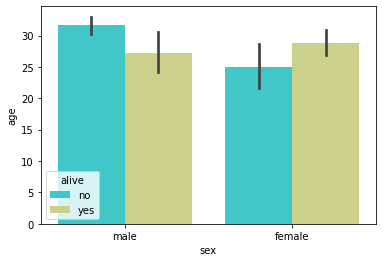

In [21]:
sns.barplot(data = titanic, x = 'sex',y = 'age', palette='rainbow', hue='alive') #automatically uses estimator = mean

<AxesSubplot:xlabel='alone', ylabel='age'>

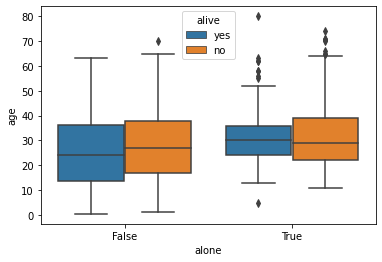

In [33]:
sns.boxplot(data = titanic, x = "alone", y = "age", hue = "alive", hue_order = ["yes", "no"])

<AxesSubplot:xlabel='Source', ylabel='Profit'>

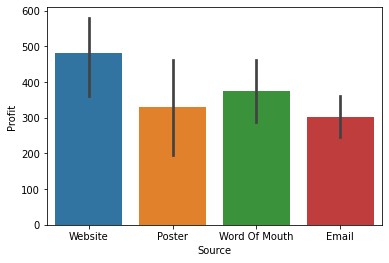

In [29]:
sid = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
src = ['Website', 'Poster', 'Website', 'Website', 'Poster', 'Word Of Mouth', 'Email', 'Website', 'Email', 'Word Of Mouth']
prof = [143.39, 230.89, 118.64, 72.09, 98.09, 230.89, 180.34, 146.69, 122.34, 143.39]
adverts = pd.DataFrame({'Sale ID': sid, 'Source': src, 'Profit':prof})
sns.barplot(data = adverts, x = 'Source', y = 'Profit', estimator = np.sum)

<AxesSubplot:xlabel='Product Type', ylabel='Age'>

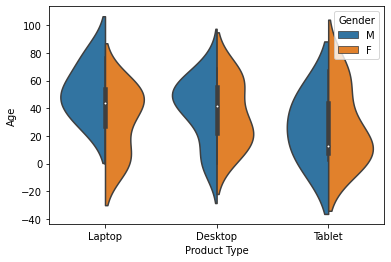

In [24]:
gender = ['M', 'F', 'F', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'F', 'M', 'F', 'F', 'M', 'F', 'F', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'F', 'M']
products = ['Laptop', 'Desktop', 'Tablet', 'Desktop', 'Desktop', 'Tablet', 'Tablet', 'Laptop', 'Desktop', 'Laptop', 'Desktop', 'Desktop', 'Laptop', 'Desktop', 'Desktop', 'Desktop', 'Laptop', 'Desktop', 'Desktop', 'Tablet', 'Desktop', 'Laptop', 'Laptop', 'Tablet', 'Desktop', 'Tablet', 'Laptop', 'Laptop', 'Laptop', 'Desktop', 'Laptop', 'Desktop', 'Laptop', 'Tablet', 'Desktop', 'Laptop', 'Desktop', 'Tablet', 'Tablet', 'Desktop']
age = np.array([30, 62, 9, 32, 47, 2, 8, 55, 69, 27, 8, 56, 57, 29, 0, 12, 54, 65, 50, 58, 56, 77, 48, 68, 37, 31, 0, 47, 42, 21, 44, 4, 6, 44, 27, 1, 49, 13, 6, 55], dtype = "int32")

store_data = pd.DataFrame({'Product Type': products, 'Gender': gender, 'Age': age})
sns.violinplot(data=store_data, x="Product Type", y="Age", hue="Gender", split=True)